In [175]:
import sys
sys.path.append("/Users/lukefoster/Documents/CompEtho/BM_GPU")

from utils import cluster_comparison

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
RESULT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU/results/final"
TARGET_DIR_PATH = "/Users/lukefoster/Documents/CompEtho/Cluster_Comparison_Pipeline"

cluster_comparison.create_group_folders(RESULT_PATH, TARGET_DIR_PATH)

CLUSTER_PATH = f"{TARGET_DIR_PATH}/cluster"
cluster_dict = cluster_comparison.create_normalized_cluster_csv(CLUSTER_PATH, TARGET_DIR_PATH)

Unable to create Target directory. Directory already exists.
Unable to create all_embeddings directory. Directory already exists.
Unable to create all_kinematic_embeddings directory. Directory already exists.
Unable to create all_postural_embeddings directory. Directory already exists.
Unable to create angle_power directory. Directory already exists.
Unable to create angles directory. Directory already exists.
Unable to create bodypoints directory. Directory already exists.
Unable to create cluster directory. Directory already exists.
Unable to create limb_power directory. Directory already exists.
Unable to create limbs directory. Directory already exists.
Unable to create rotated_bodypoints directory. Directory already exists.
Unable to create scaled_bodypoints directory. Directory already exists.
07YTminfd_antmovie200928211544 has 0 good clusters
newant_antmovie200924212211 has 0 good clusters
12RWminfd_antmovie200927224447 has 0 good clusters
10BYmidfd_antmovie200928222401 has 0 go

In [174]:
cluster_dict

{'10BYmidfd_antmovie200928223820': {123: 10.0,
  126: 10.0,
  127: 56.0,
  128: 56.0,
  129: 56.0,
  130: 13.0,
  131: 51.0,
  132: 56.0,
  133: 56.0,
  134: 56.0,
  3865: 10.0,
  3866: 10.0,
  3867: 10.0,
  3868: 10.0,
  3869: 10.0,
  3870: 10.0,
  3871: 10.0,
  3872: 10.0,
  3873: 10.0,
  3874: 10.0,
  3875: 10.0,
  3876: 10.0,
  3877: 10.0,
  3878: 10.0,
  3879: 10.0,
  3880: 10.0,
  3881: 10.0,
  3882: 10.0,
  3883: 10.0,
  3884: 10.0,
  3885: 10.0,
  3886: 10.0,
  3887: 10.0,
  3888: 10.0,
  3889: 10.0,
  3890: 10.0,
  3891: 10.0,
  3892: 10.0,
  3893: 10.0,
  3894: 10.0,
  3896: 10.0,
  3897: 10.0,
  3899: 10.0,
  3900: 10.0,
  3902: 10.0,
  3909: 10.0,
  3910: 10.0,
  3911: 10.0,
  3912: 10.0,
  3913: 10.0,
  3914: 10.0,
  3915: 10.0,
  3916: 10.0,
  3917: 10.0,
  3918: 10.0,
  3919: 10.0,
  3920: 10.0,
  3921: 10.0,
  3922: 10.0,
  3923: 10.0,
  3924: 10.0,
  3925: 10.0,
  3926: 10.0,
  3927: 10.0,
  3928: 10.0,
  3929: 10.0,
  3930: 55.0,
  3931: 10.0,
  3932: 10.0,
  3933: 10

In [1]:
human = pd.read_csv("/Users/lukefoster/Desktop/behv_list.csv")

NameError: name 'pd' is not defined

In [177]:
human

Timestamp_frame                 behav
0                 0  walk_slow_atn_ground
1                28         st_atn_ground
2                42  walk_slow_atn_ground
3               121          st_limb_mvng
4               132  walk_slow_atn_ground
..              ...                   ...
308            9875             st_ch_dir
309            9888  walk_slow_atn_ground
310            9912             st_ch_dir
311            9928            st_atn_air
312            9975              st_atn_x

[313 rows x 2 columns]

In [198]:
human_behvs = {}

for index,row in enumerate(human['behav']):
    if row not in human_behvs.keys():
        human_behvs[row] = []
    for i in range(int(human['Timestamp_frame'][index]), int(human['Timestamp_frame'][index+1])):
        human_behvs[row].append(i)

KeyError: 313

In [205]:
human_behvs.keys()

dict_keys(['walk_slow_atn_ground', 'st_atn_ground', 'st_limb_mvng', '-1', 'st_atn_mvng', 'walk_slow_atn_ground_2', 'st_atn_wall', 'st_climb_wall', '-2', 'walk_on_wall', 'walk_mid_atn_ground', 'walk_slow', 'walk_slow_ch_dir', 'st_ch_dir', 'walk_slow_atn_ground_3', 'walk_mid_atn_ground_2', 'walk_slow_atn_x', 'st_atn_air', 'walk_back', 'grooming_leg', 'st_frozen', 'grooming_leg_l', 'walk_slow_z_atn_x', 'grooming_leg_r', 'st_atn_x'])

In [231]:
def barchart_clusters(behavior_name):

    temp_clusters = []

    for frame in human_behvs[behavior_name]:
        try:
            temp_clusters.append(cluster_dict['02WGmidfd_antmovie201010194713'][frame])
        except:
            pass

    clusters = np.arange(0,66)
    counts = np.zeros(66)

    for cluster in temp_clusters:
        counts[int(cluster)] += 1

    fig,ax = plt.subplots(figsize=(20,5))
    plt.bar(clusters,counts)
    plt.xticks(np.arange(0, 66, 1.0))
    plt.title(behavior_name)
    plt.show()

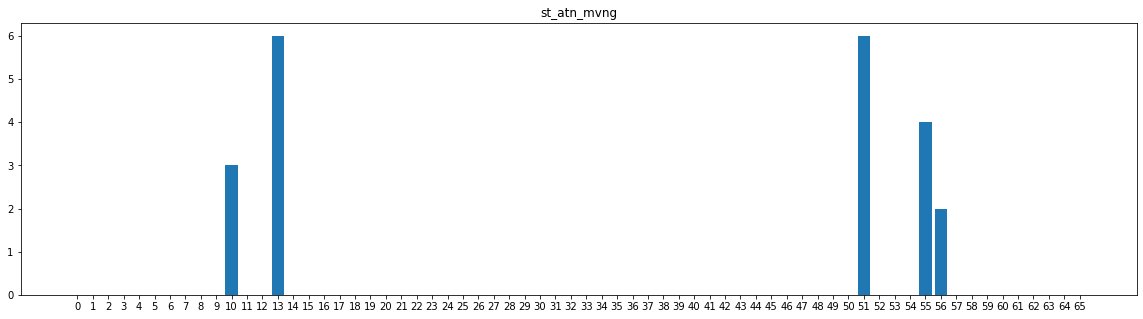

In [232]:
barchart_clusters('st_atn_mvng')

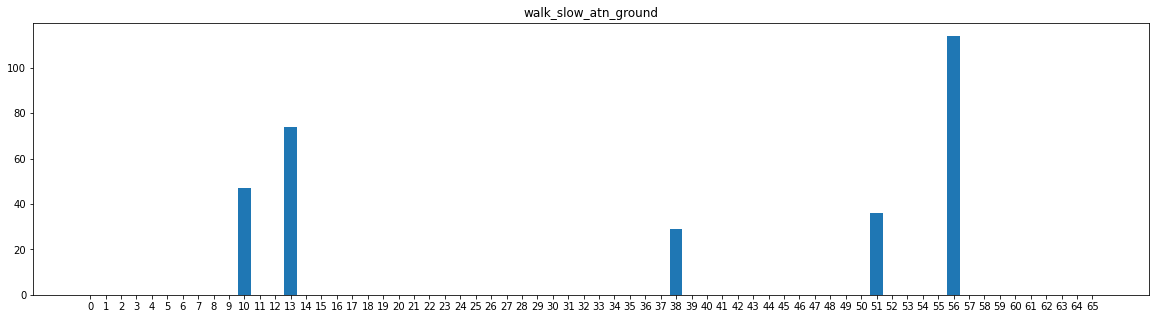

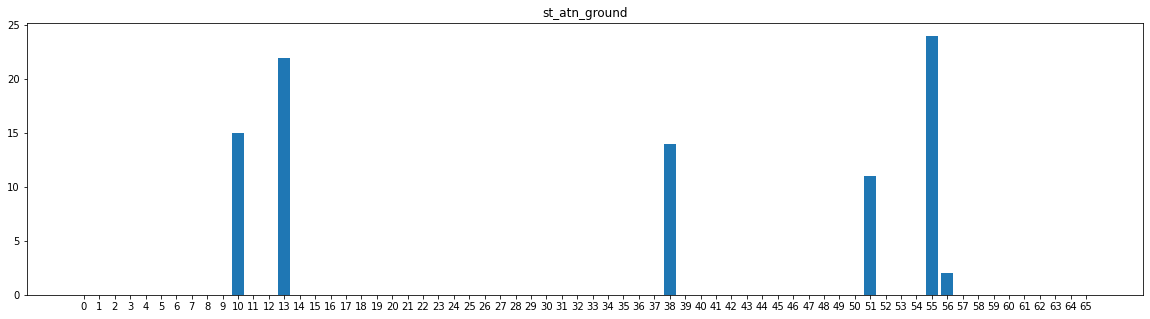

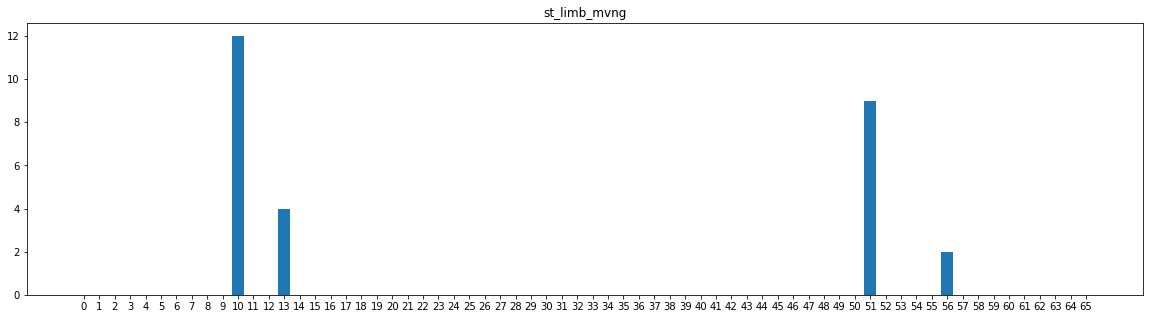

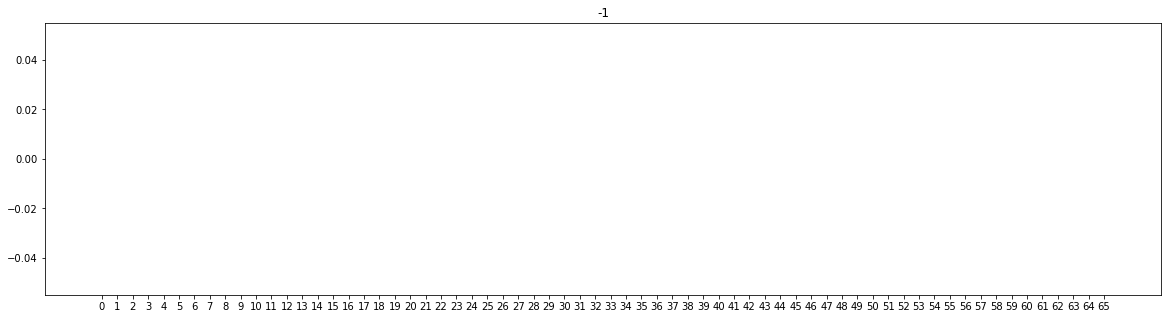

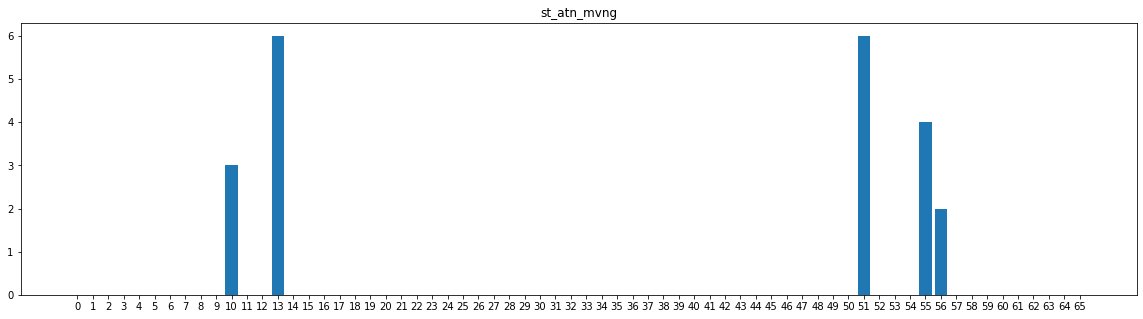

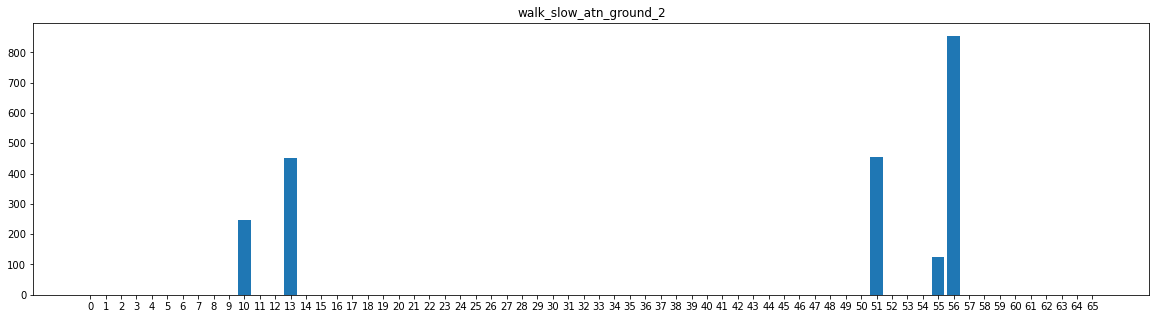

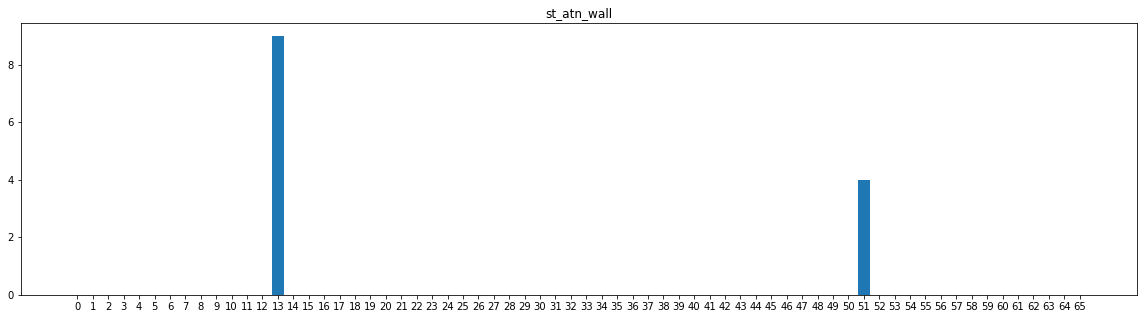

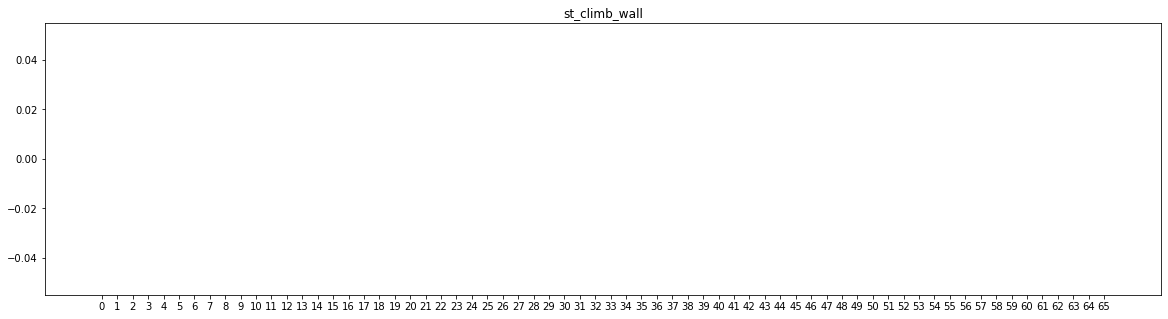

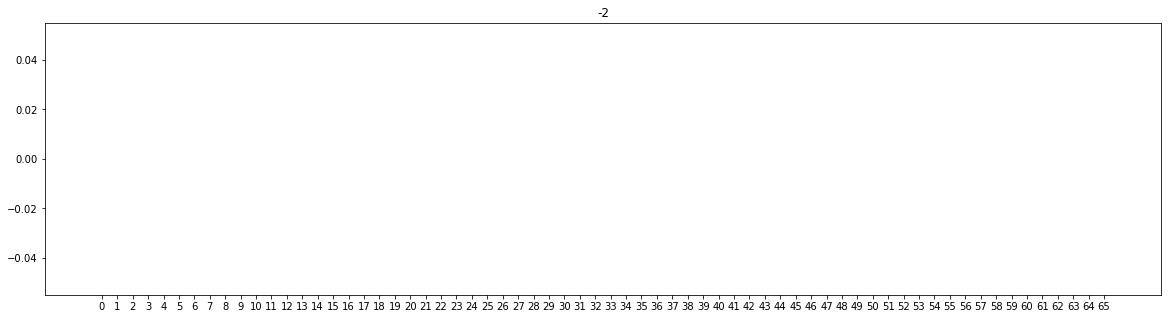

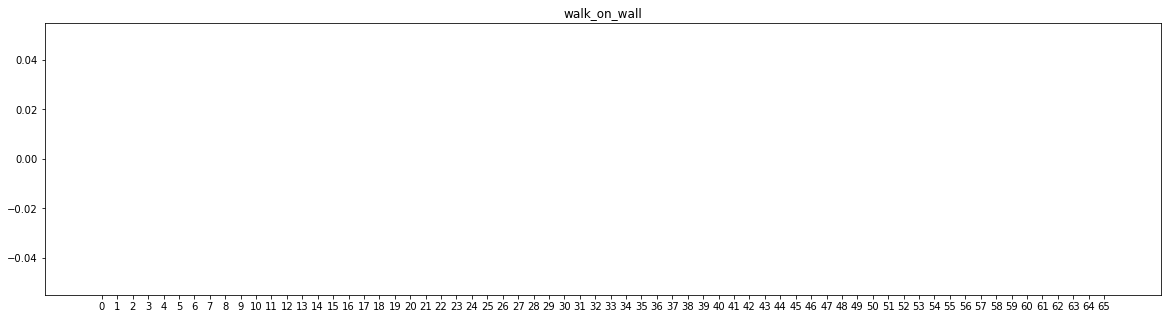

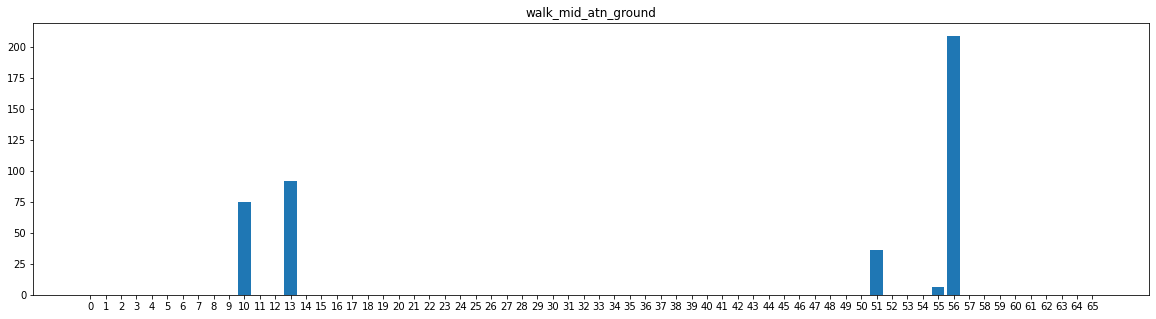

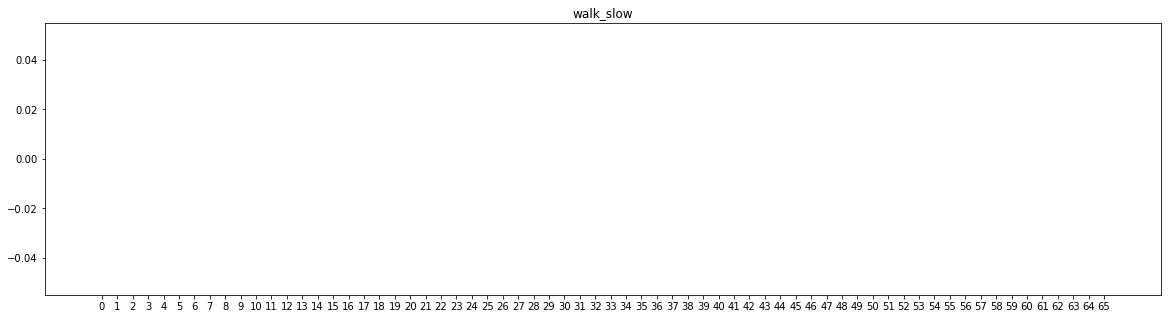

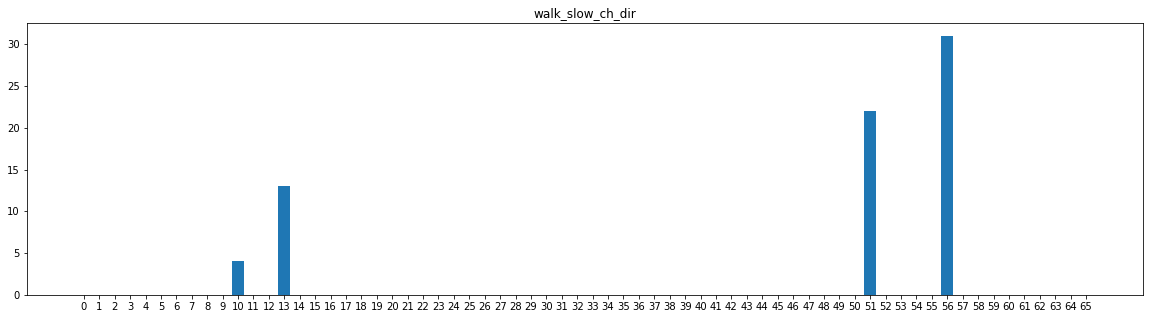

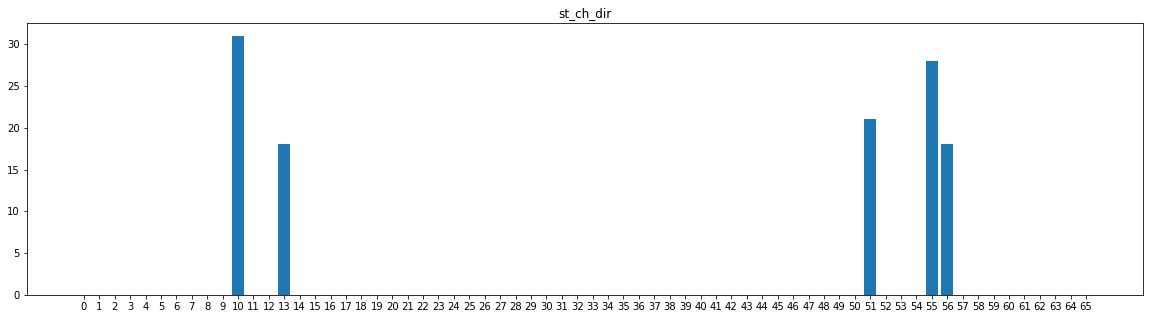

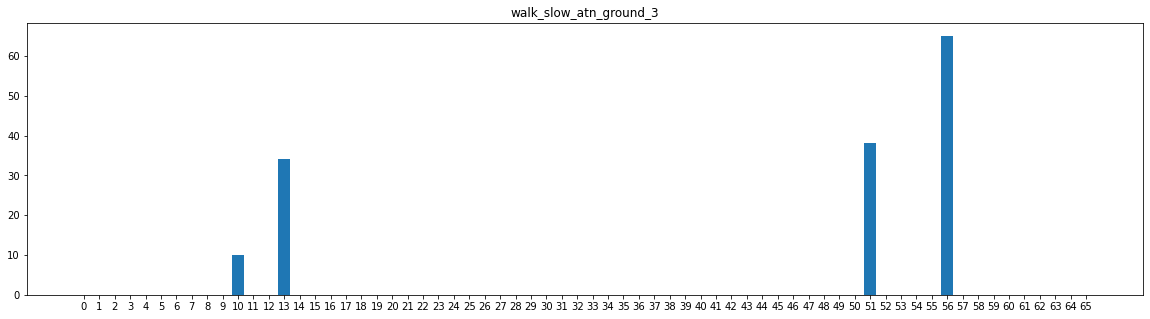

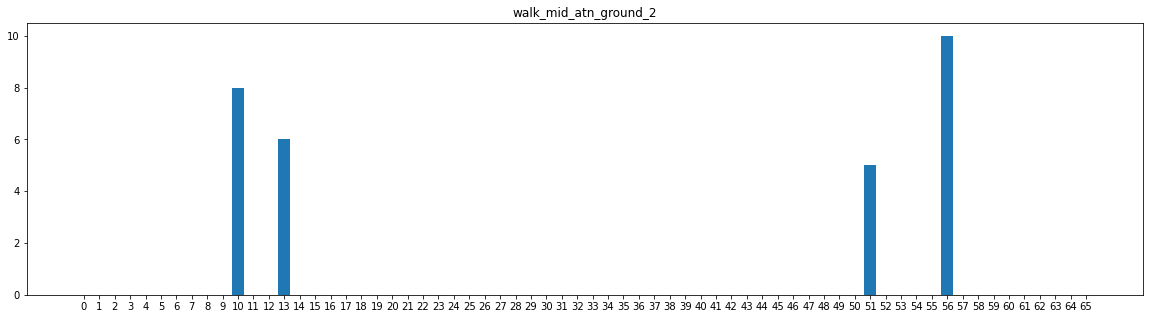

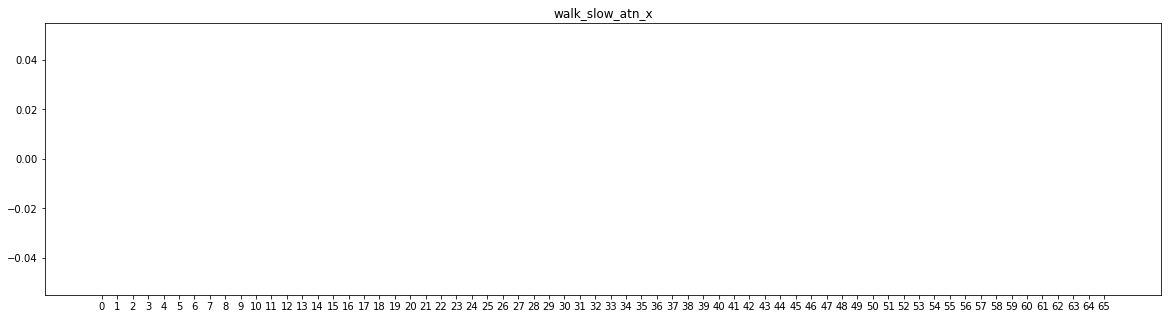

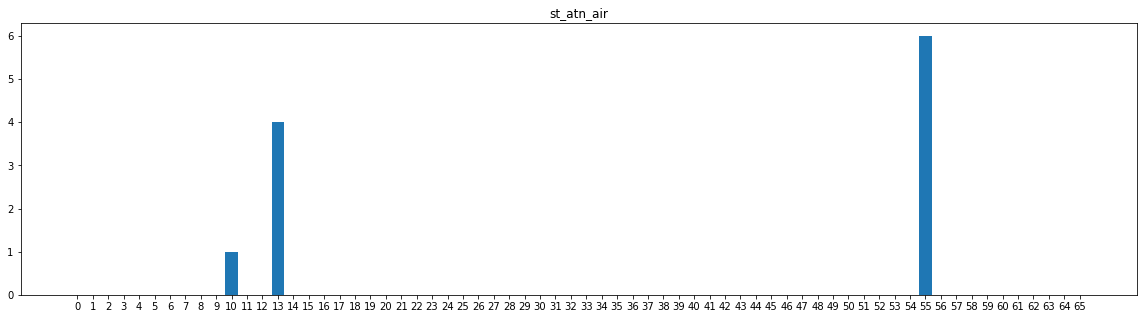

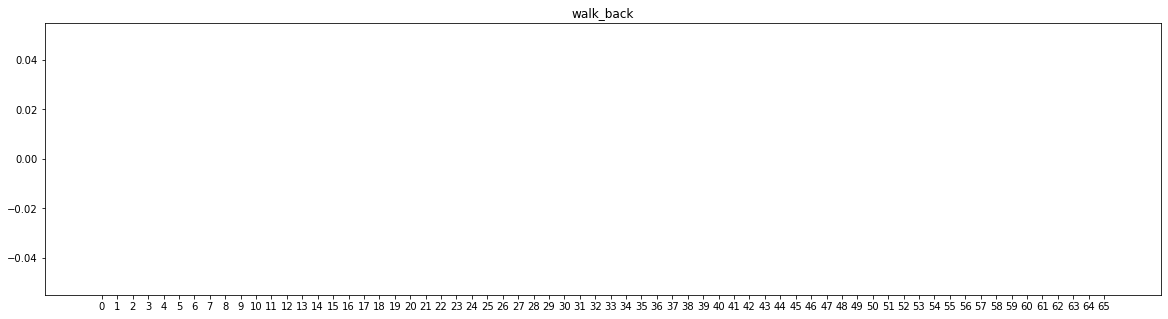

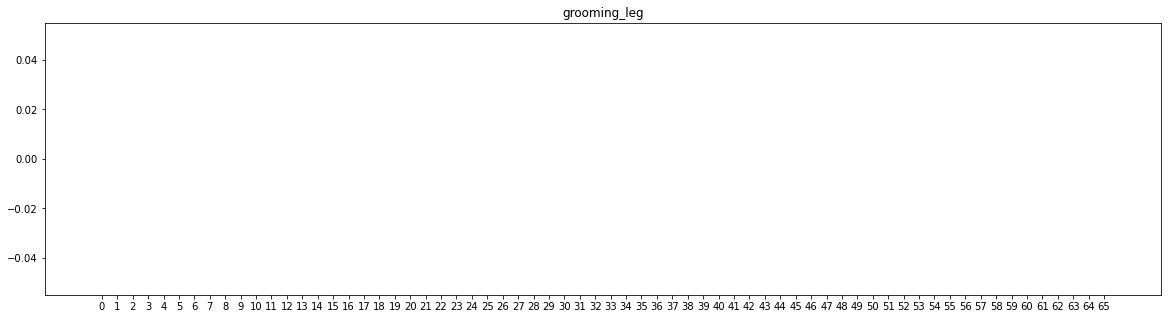

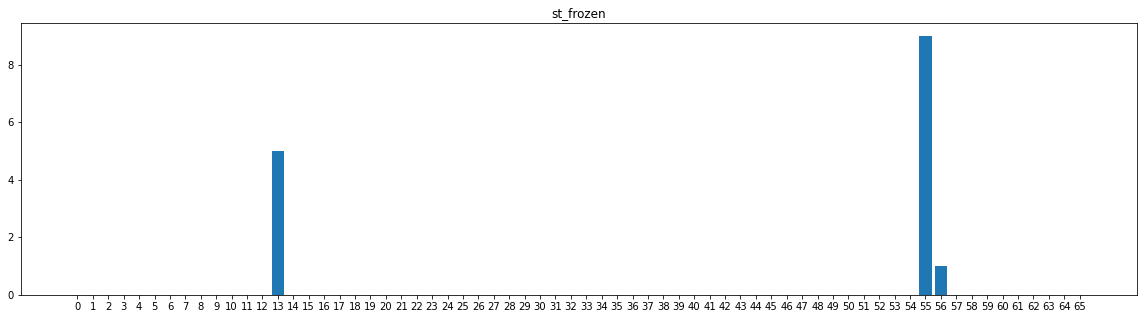

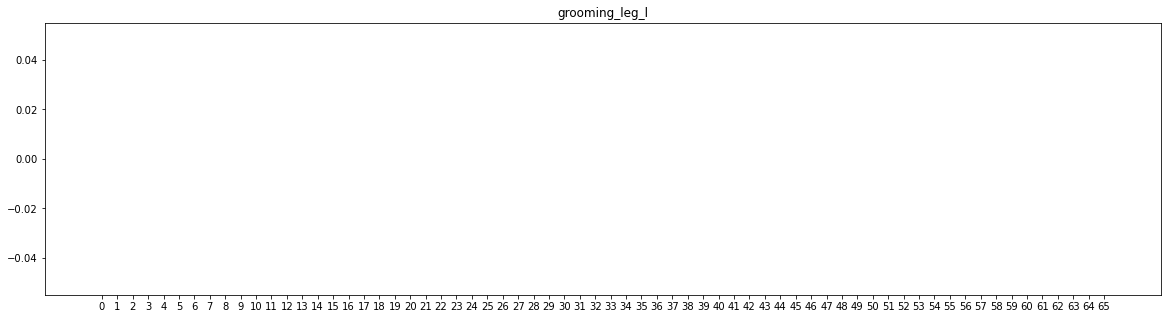

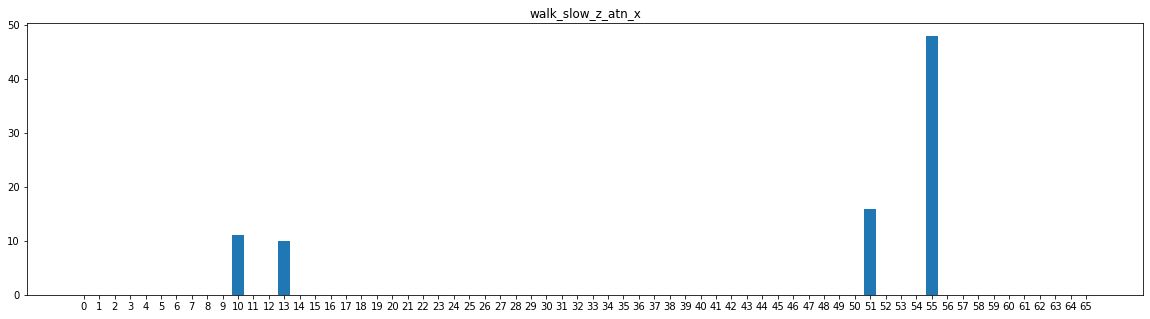

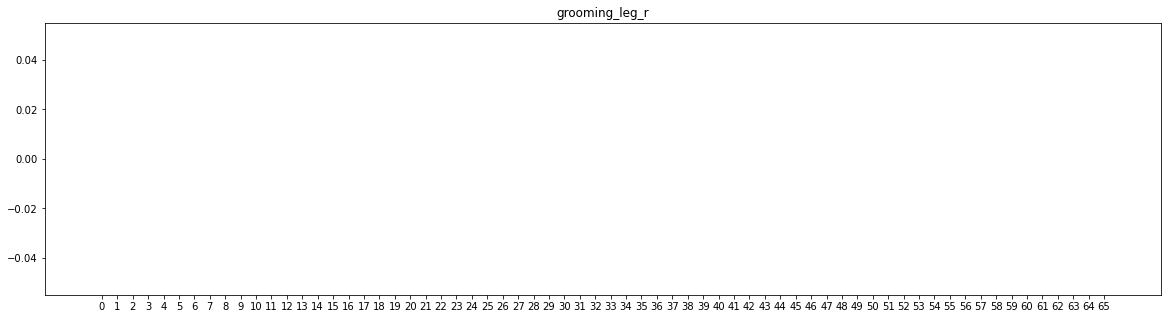

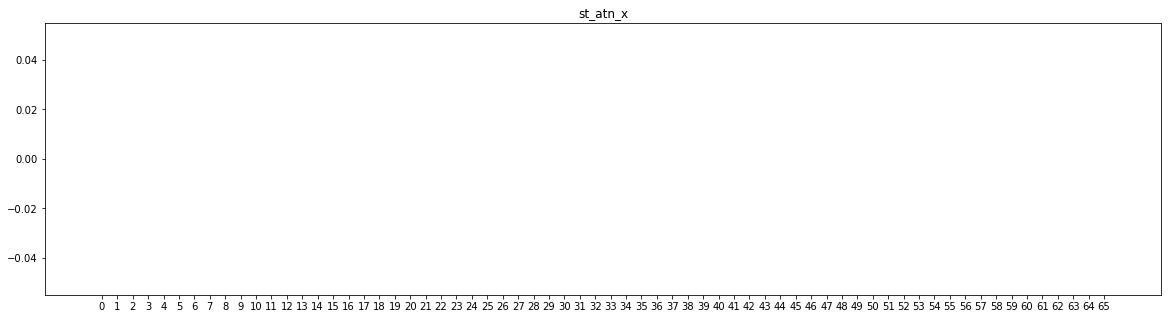

In [233]:
for behavior in human_behvs.keys():
    barchart_clusters(behavior)

In [66]:
def search_for(video_name, behavior_name):
    frames = []
    clusters = []
    for frame,cluster in cluster_dict[video_name].items():
        if frame in behavior_name:
            #print(frame,cluster)
            frames.append(frame)
            clusters.append(cluster)

    fig, ax = plt.subplots(figsize=(40,20))
    ax = sns.lineplot(x=frames, y=clusters)
    plt.ylim([0,65])
    plt.yticks(np.arange(0, 66, 1.0))
    #sns.lineplot(x=frames,y=clusters)

## 06dDminfd_antmovie200926213750

In [77]:
movie = "06dDminfd_antmovie200926213750"

### walk_slow_atn_ground

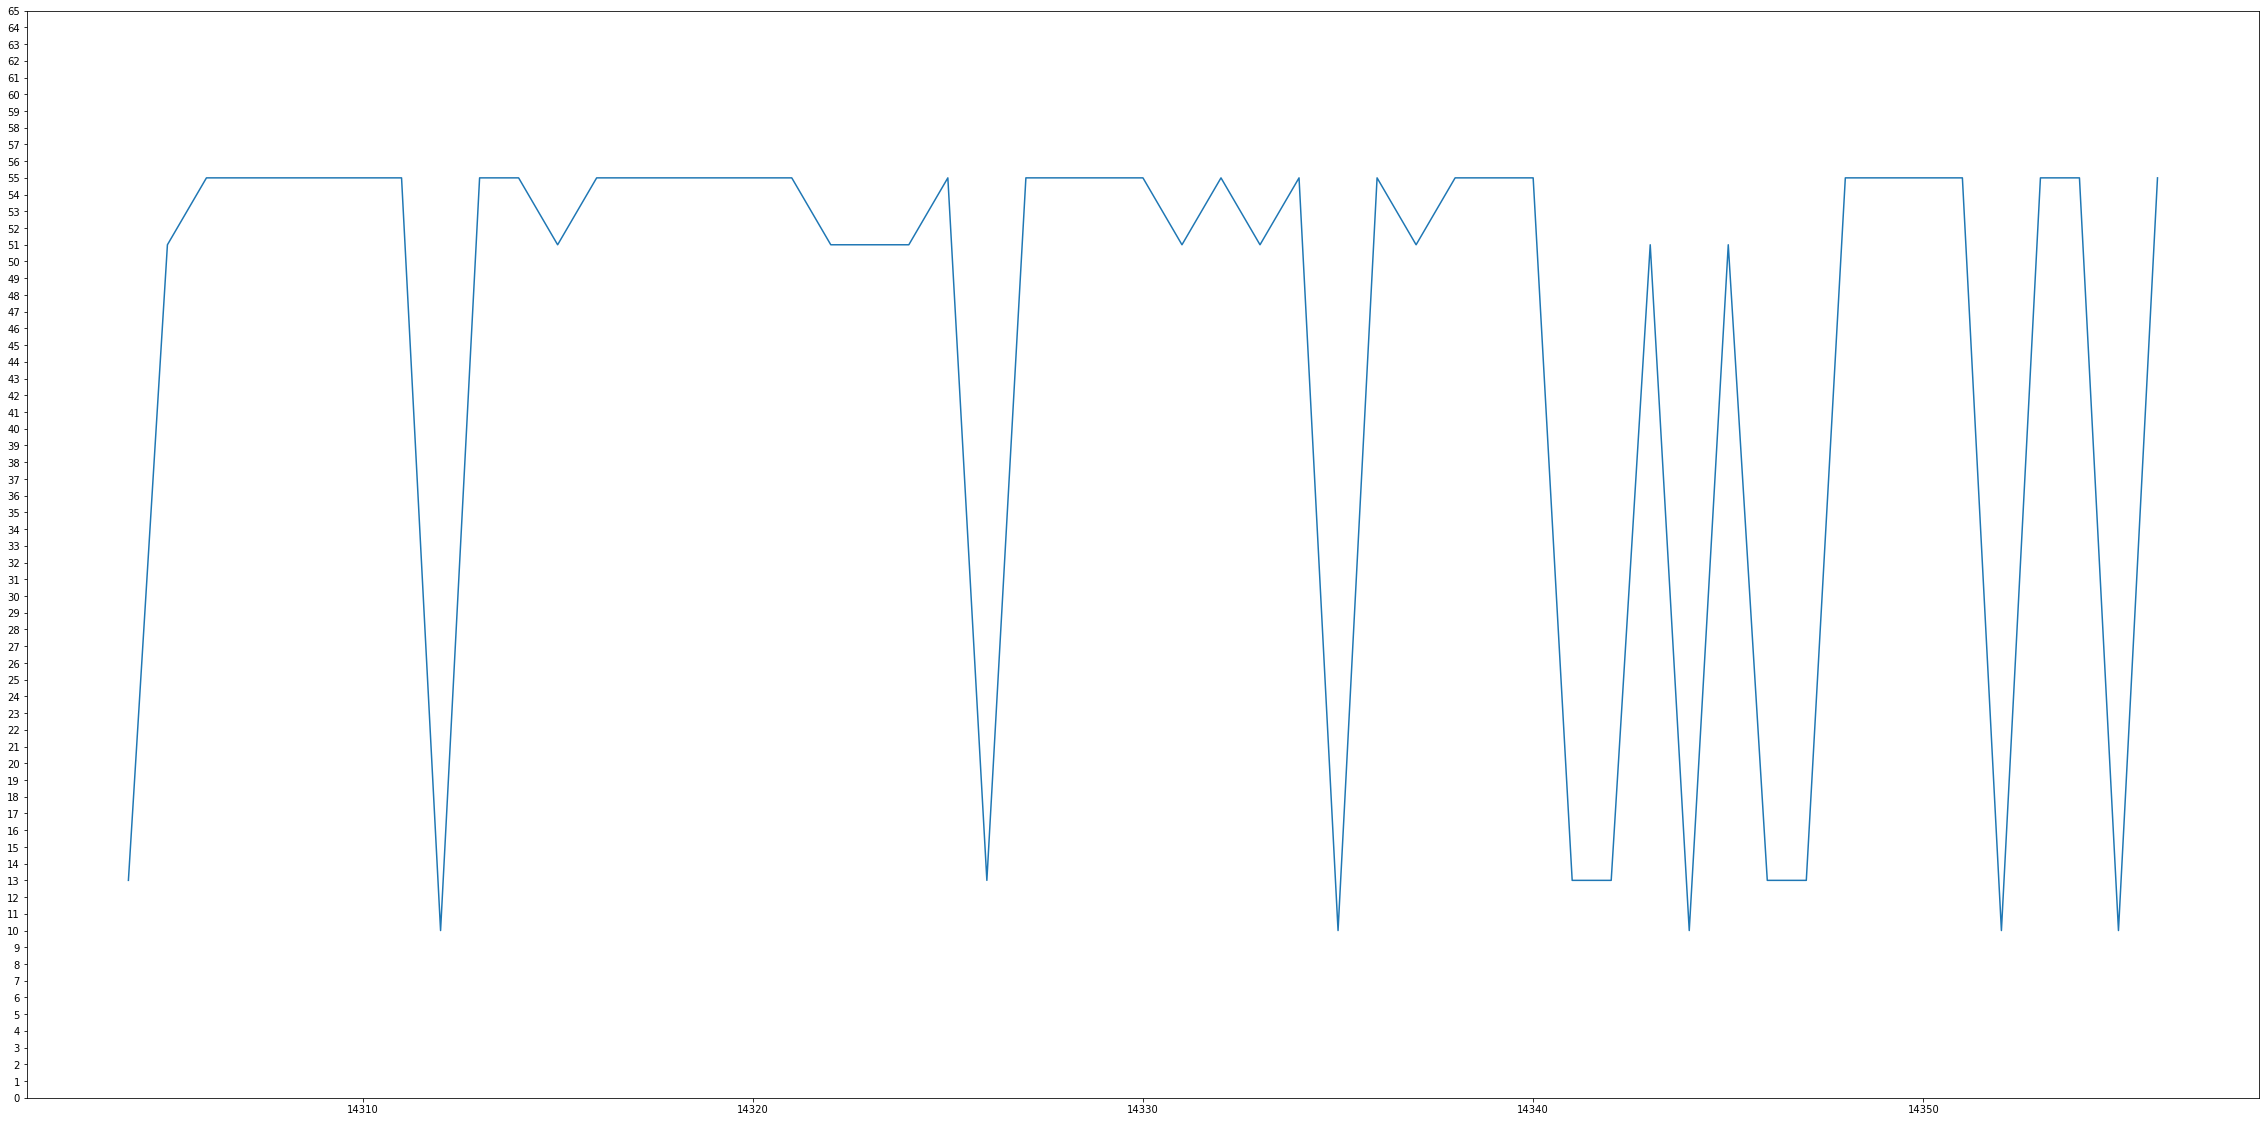

In [78]:
search_for(movie, range(14188,14357))

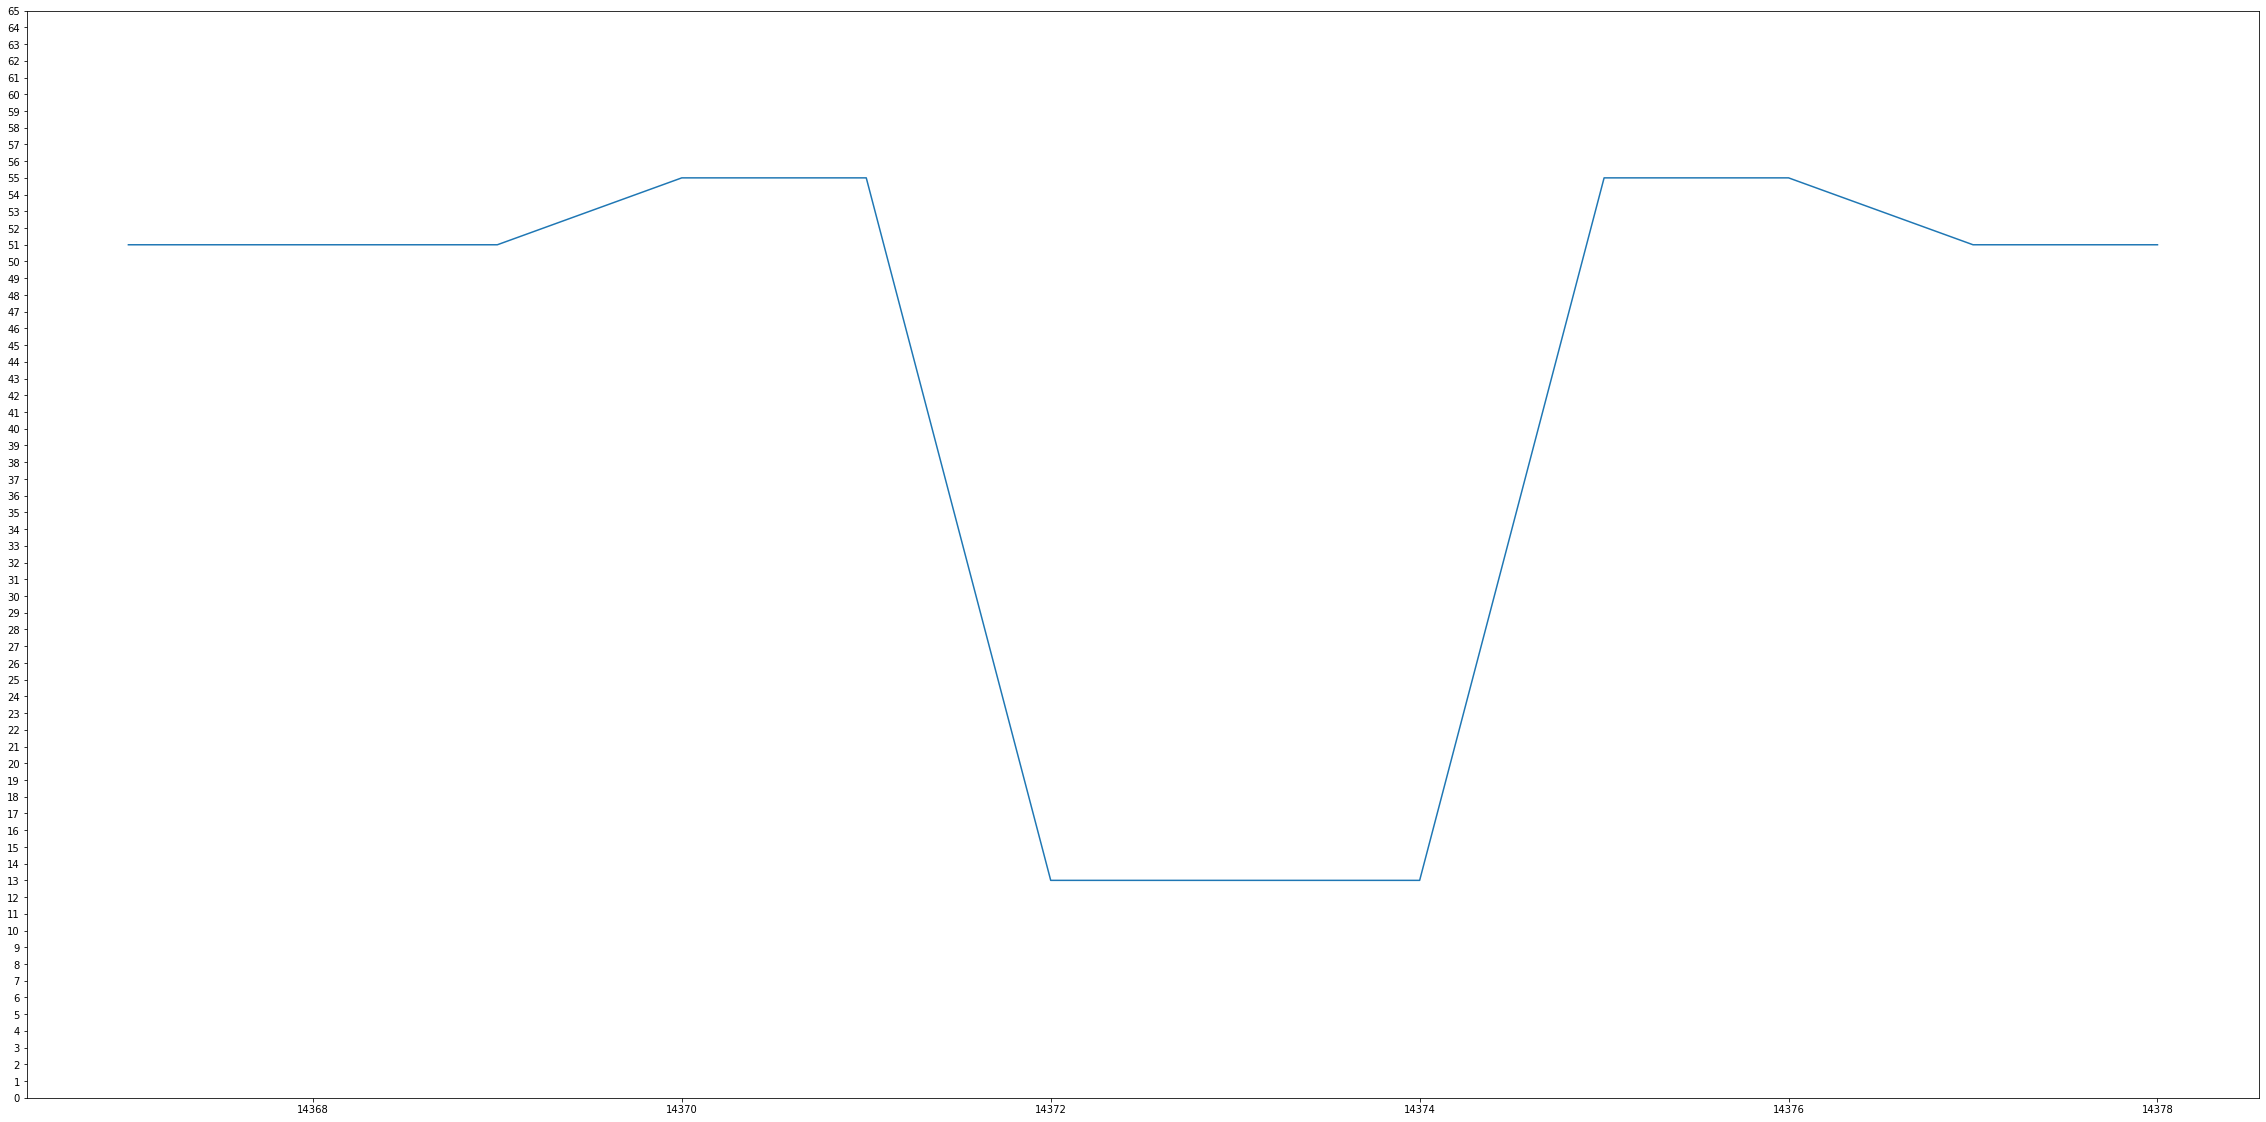

In [79]:
search_for(movie, range(14367,14481))

### walk_slow_ch_dir

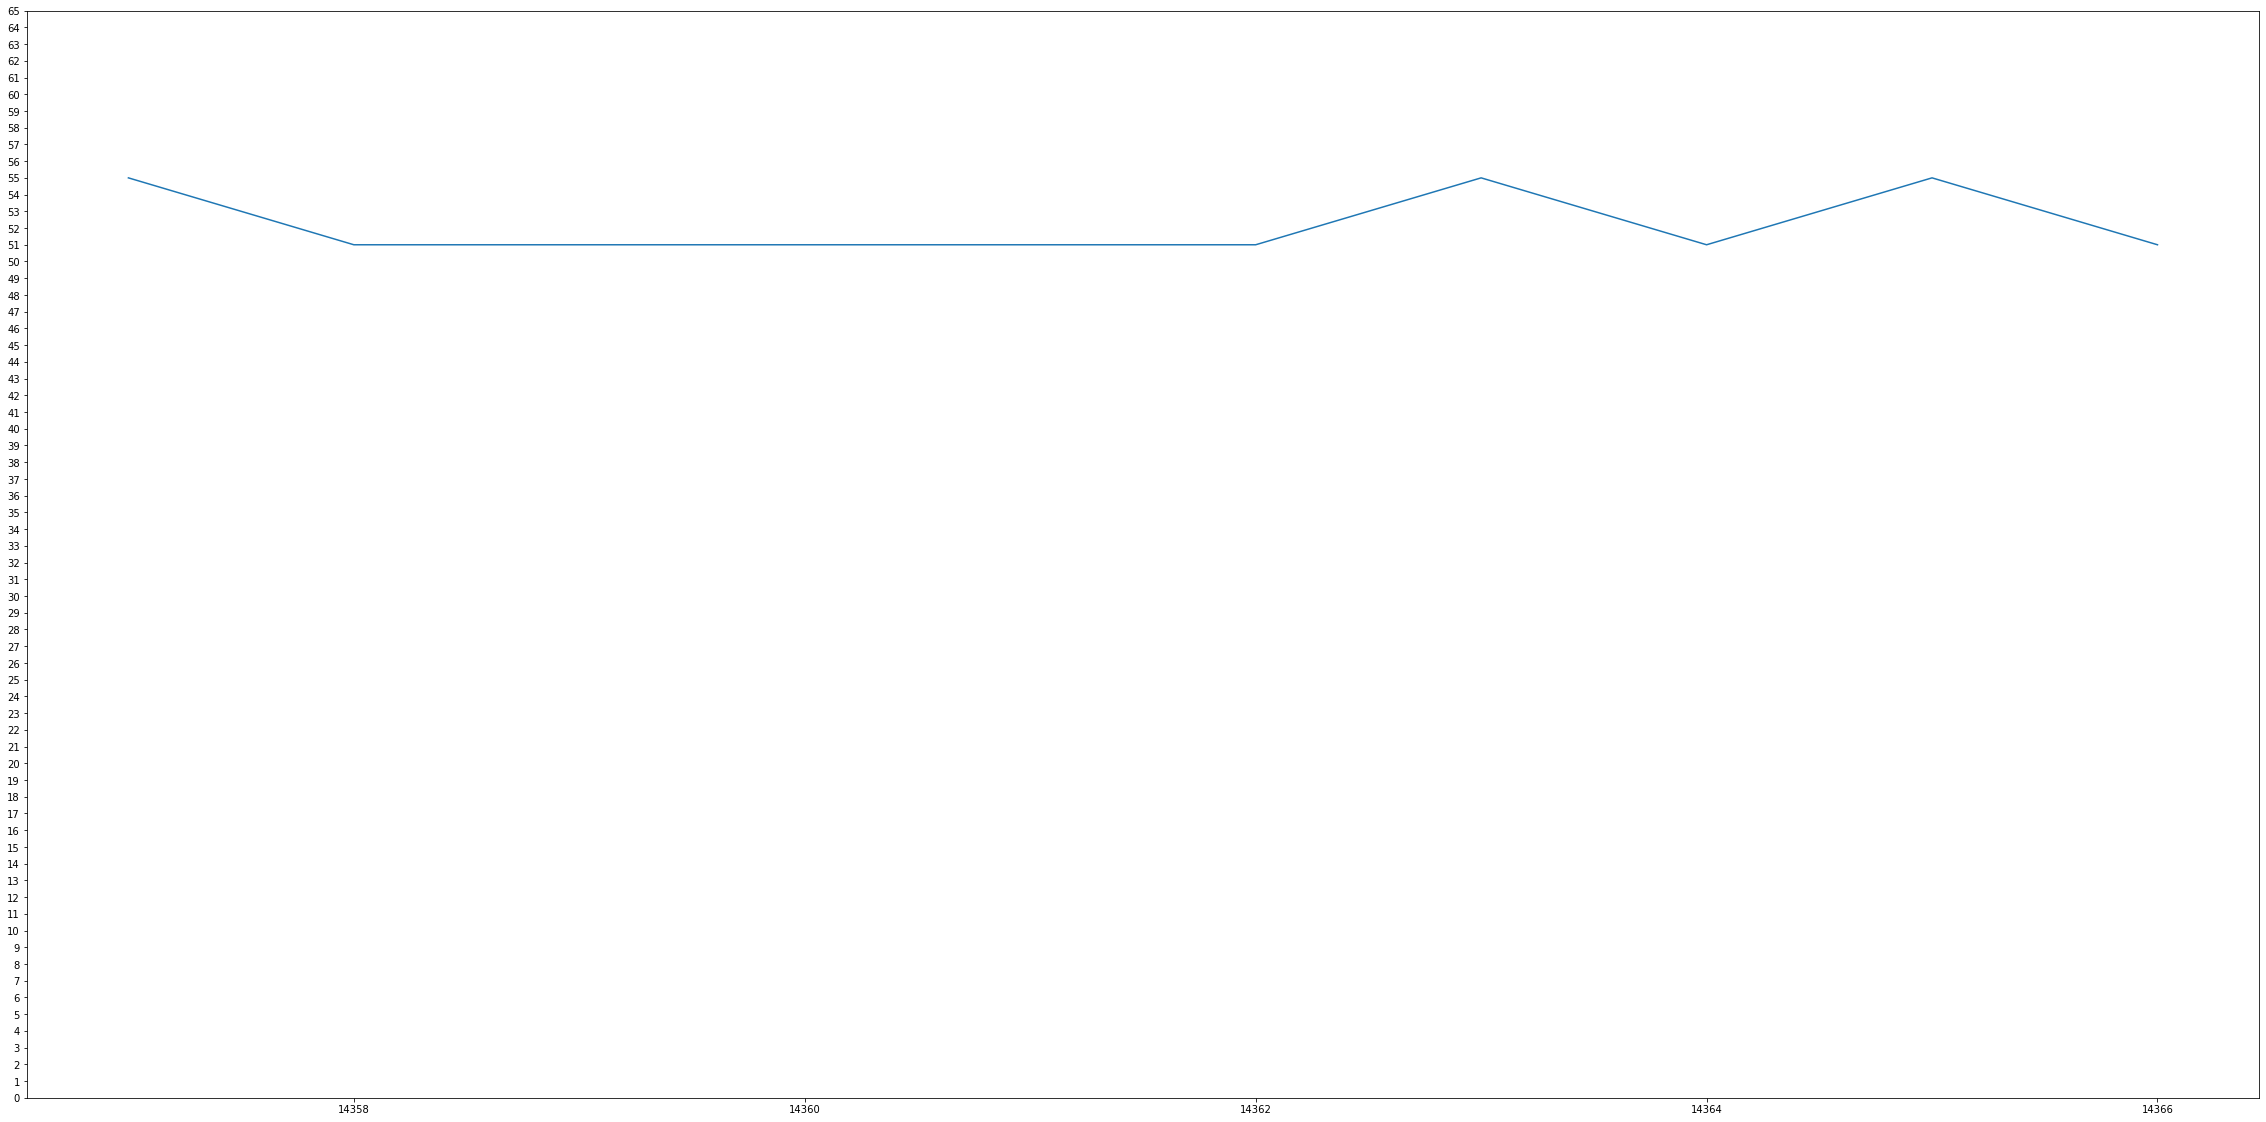

In [80]:
search_for(movie, range(14357,14367))

## 02WGmidfd_antmovie201010194713

In [81]:
movie = '02WGmidfd_antmovie201010194713'

### walk_slow_atn_ground

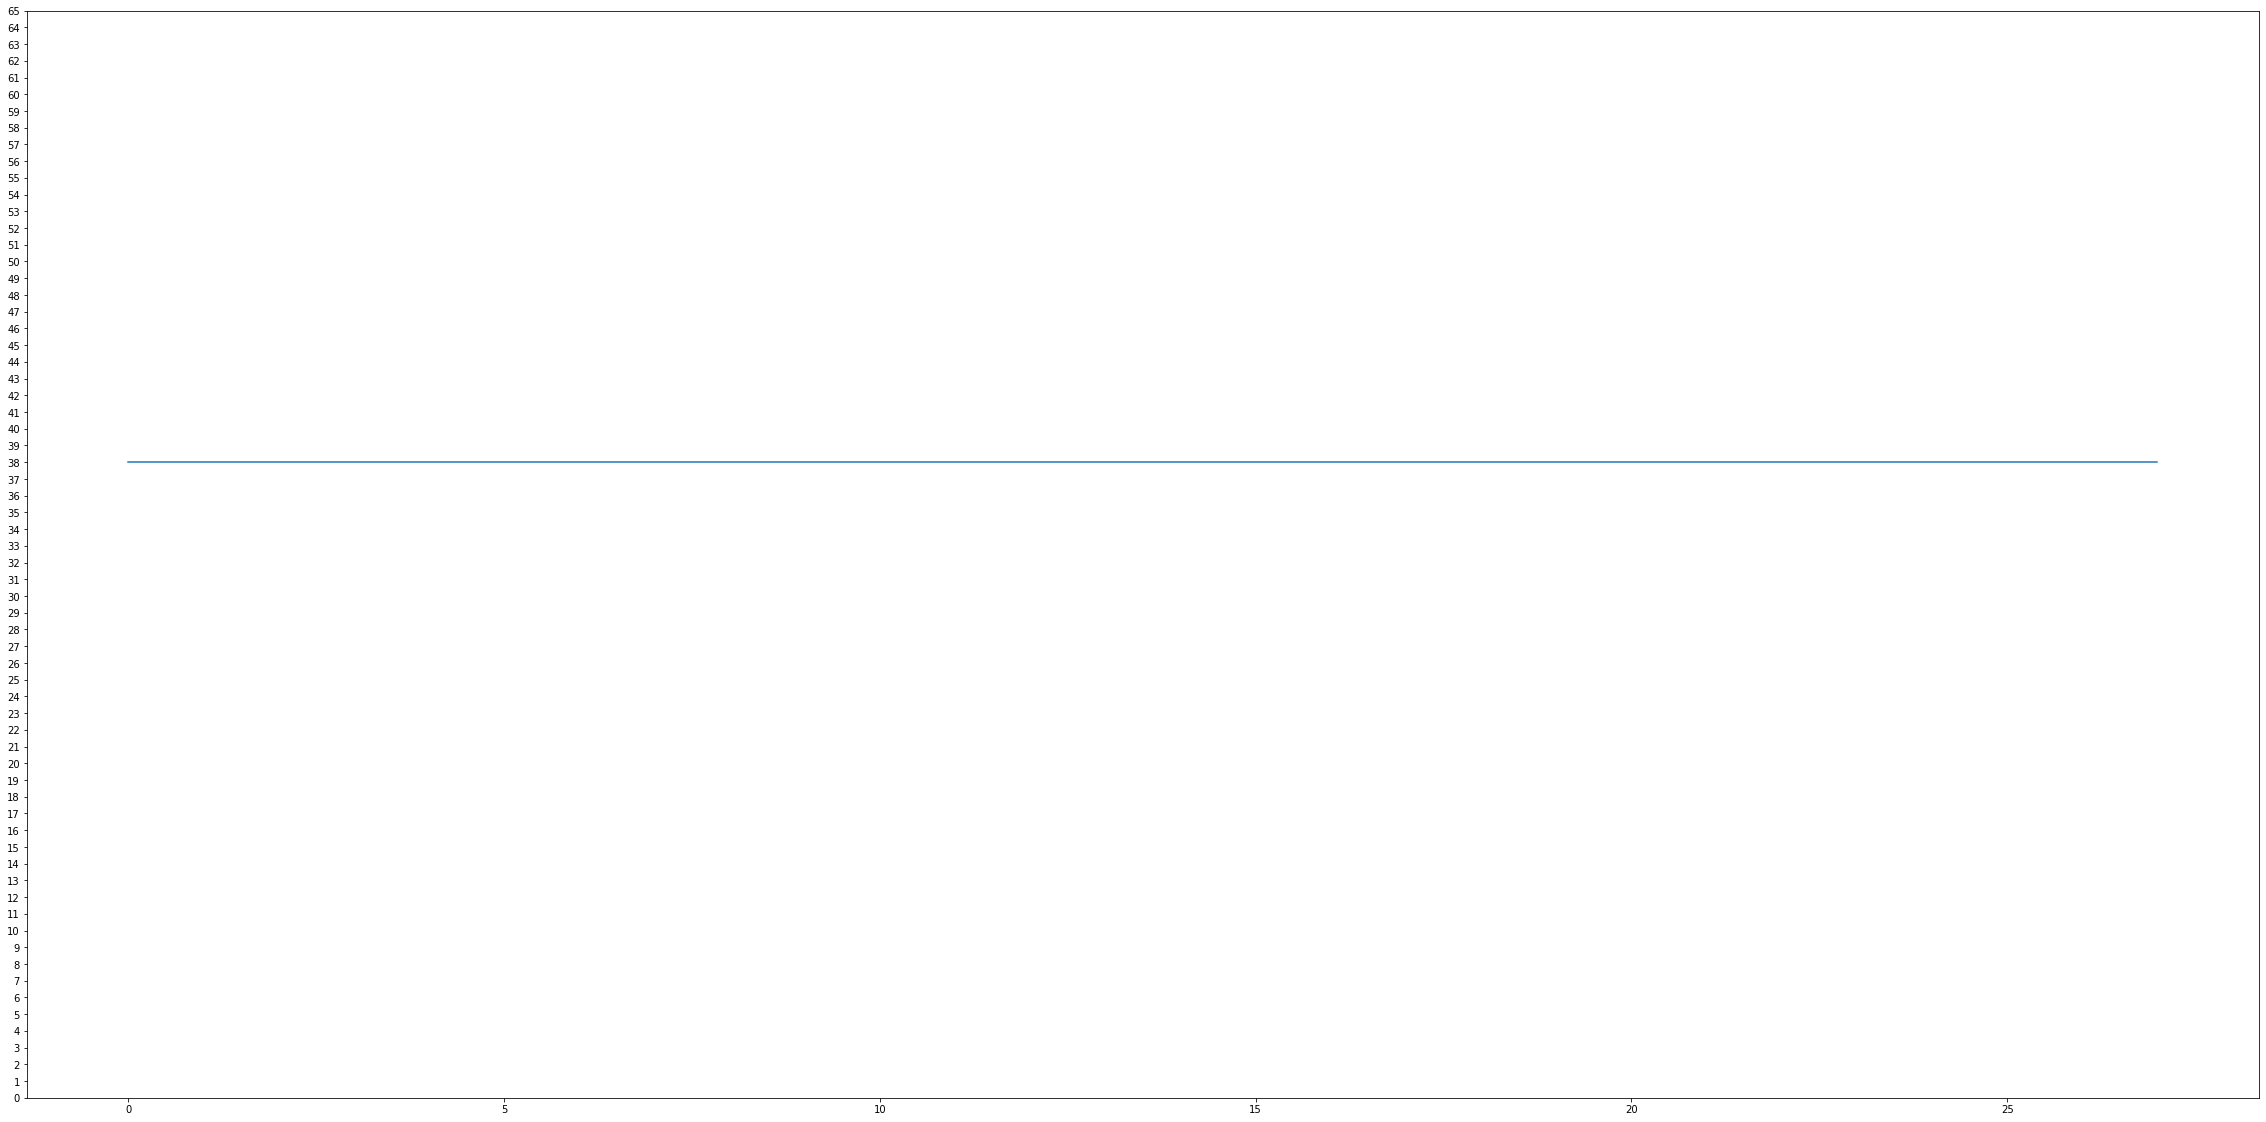

In [75]:
search_for(movie, range(0,28))

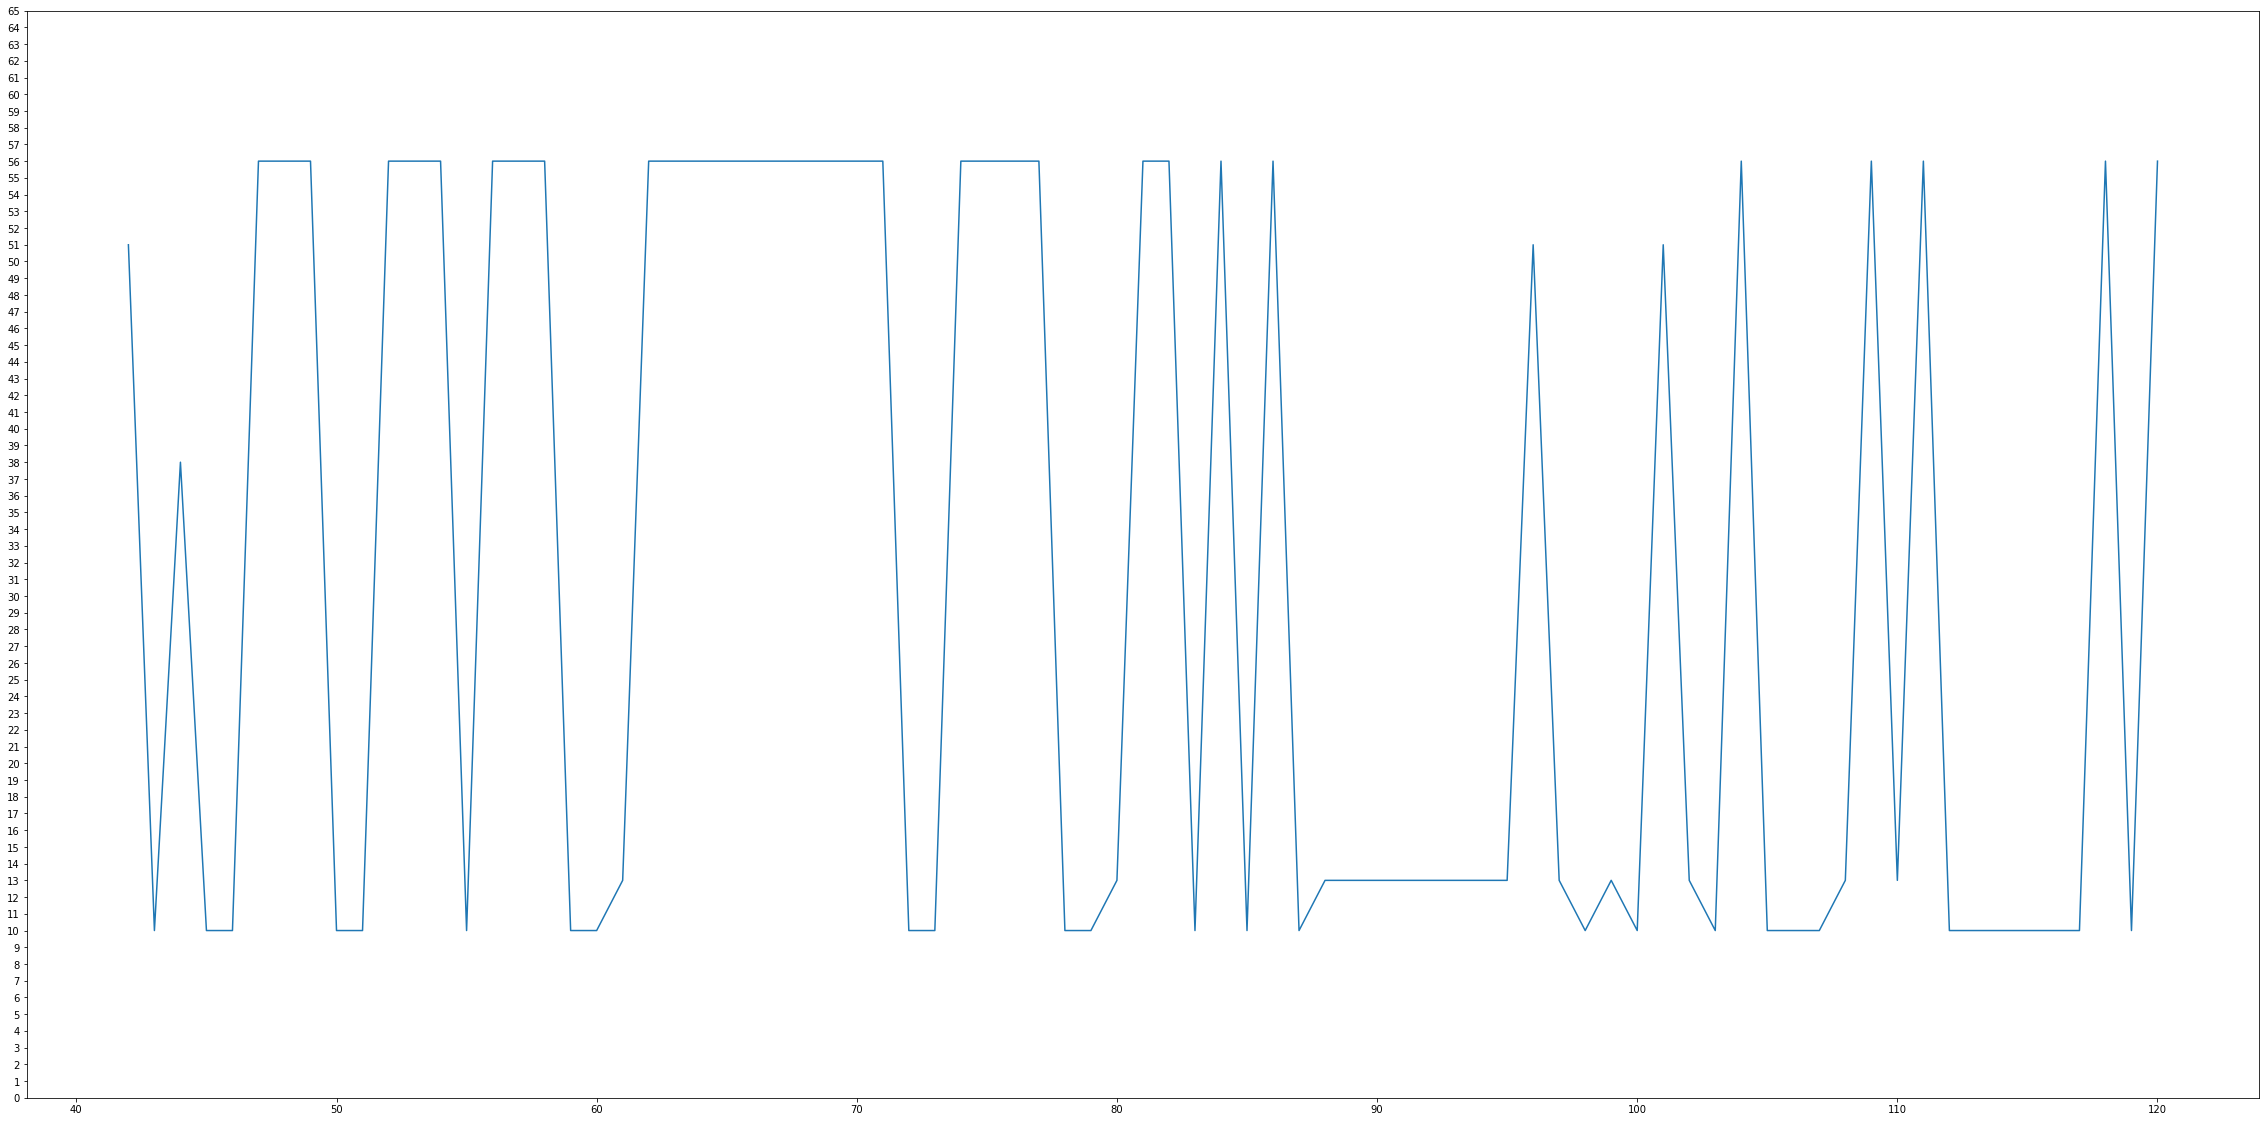

In [76]:
search_for(movie, range(42,121))

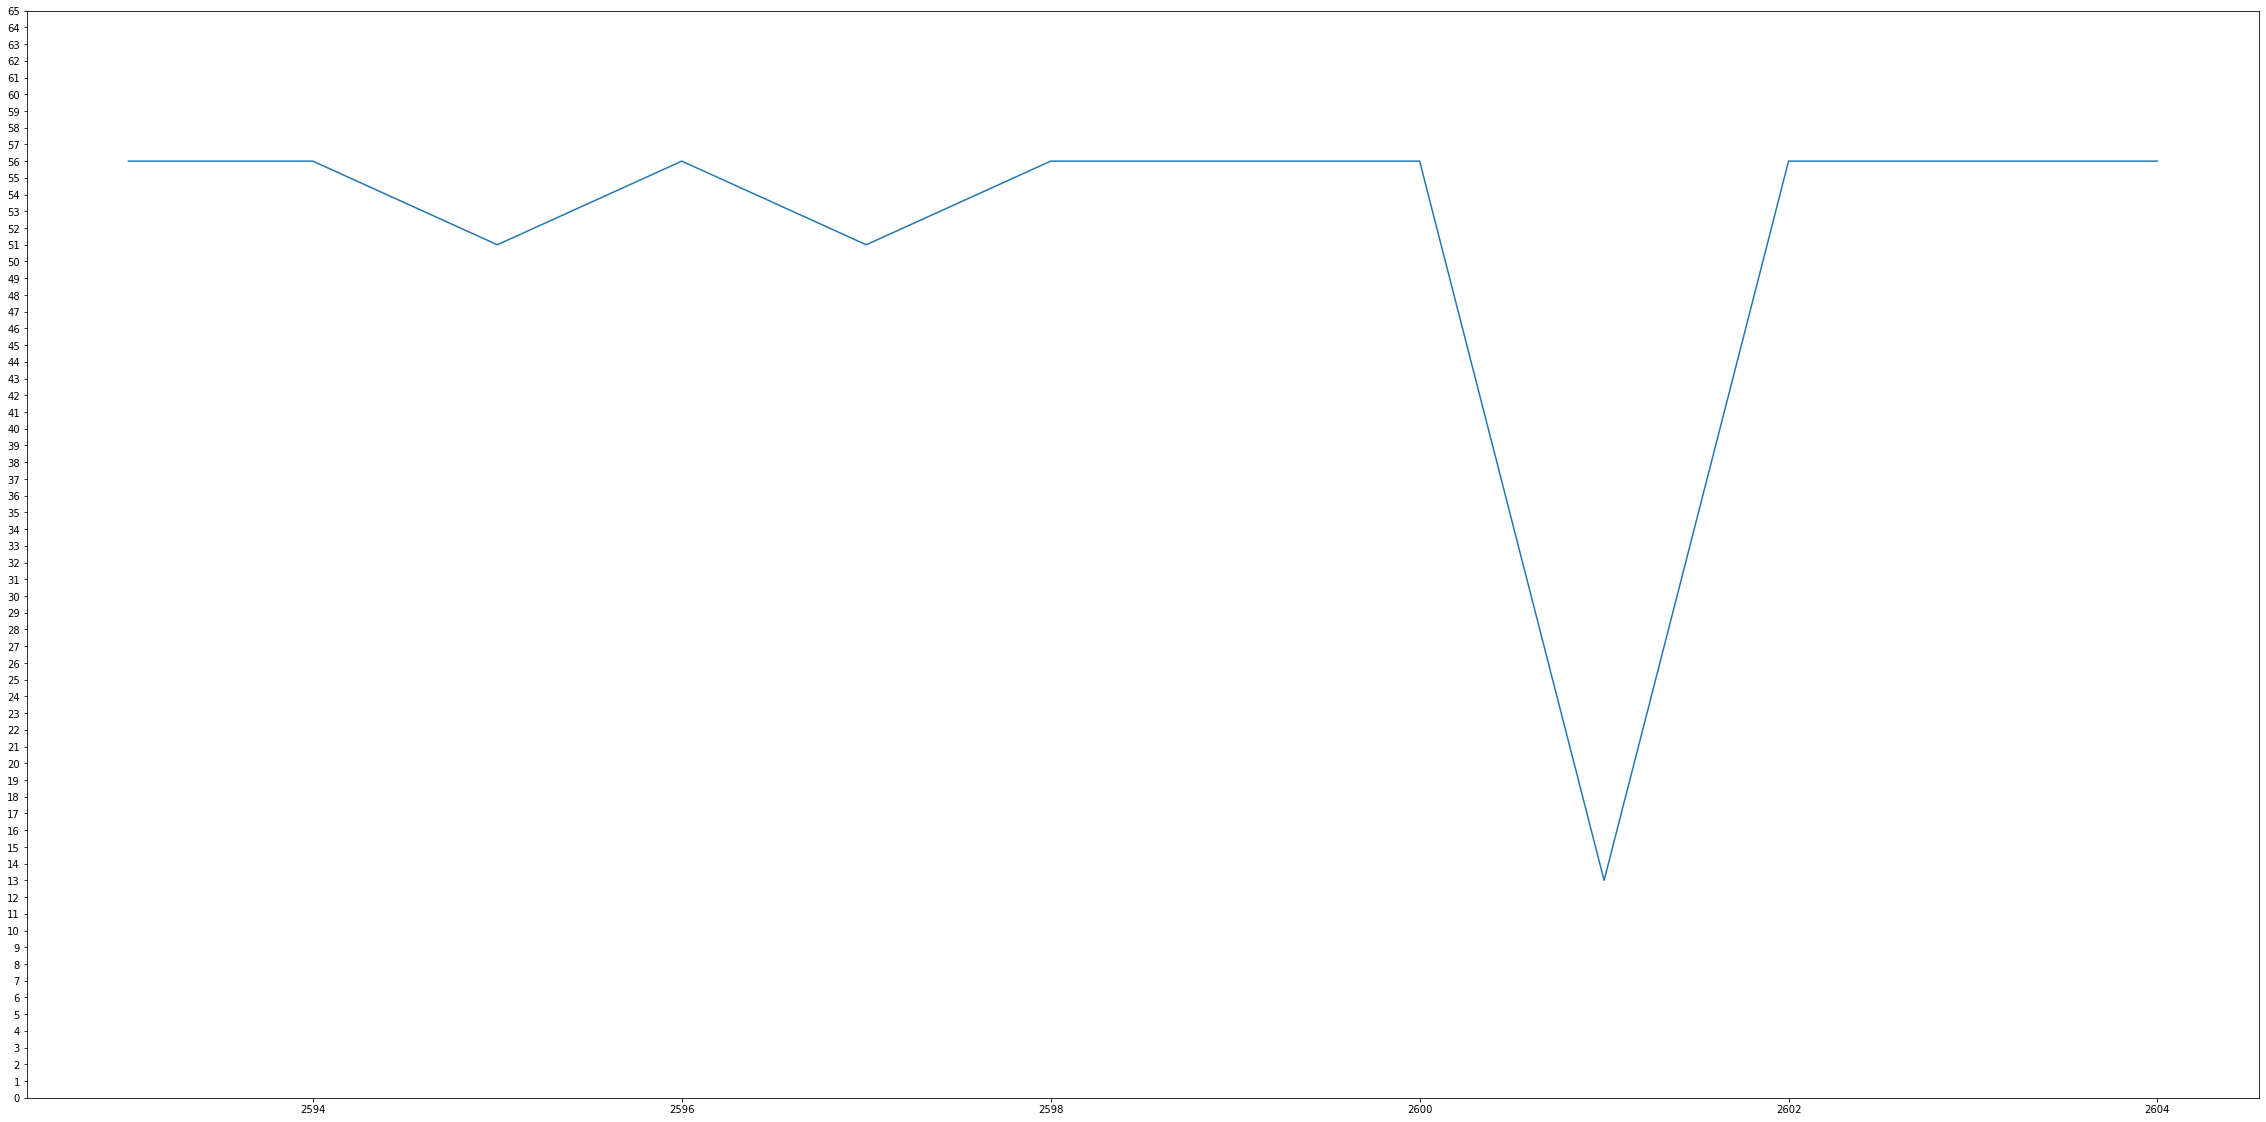

In [83]:
search_for(movie, range(2593,2638))

### st_atn_wall

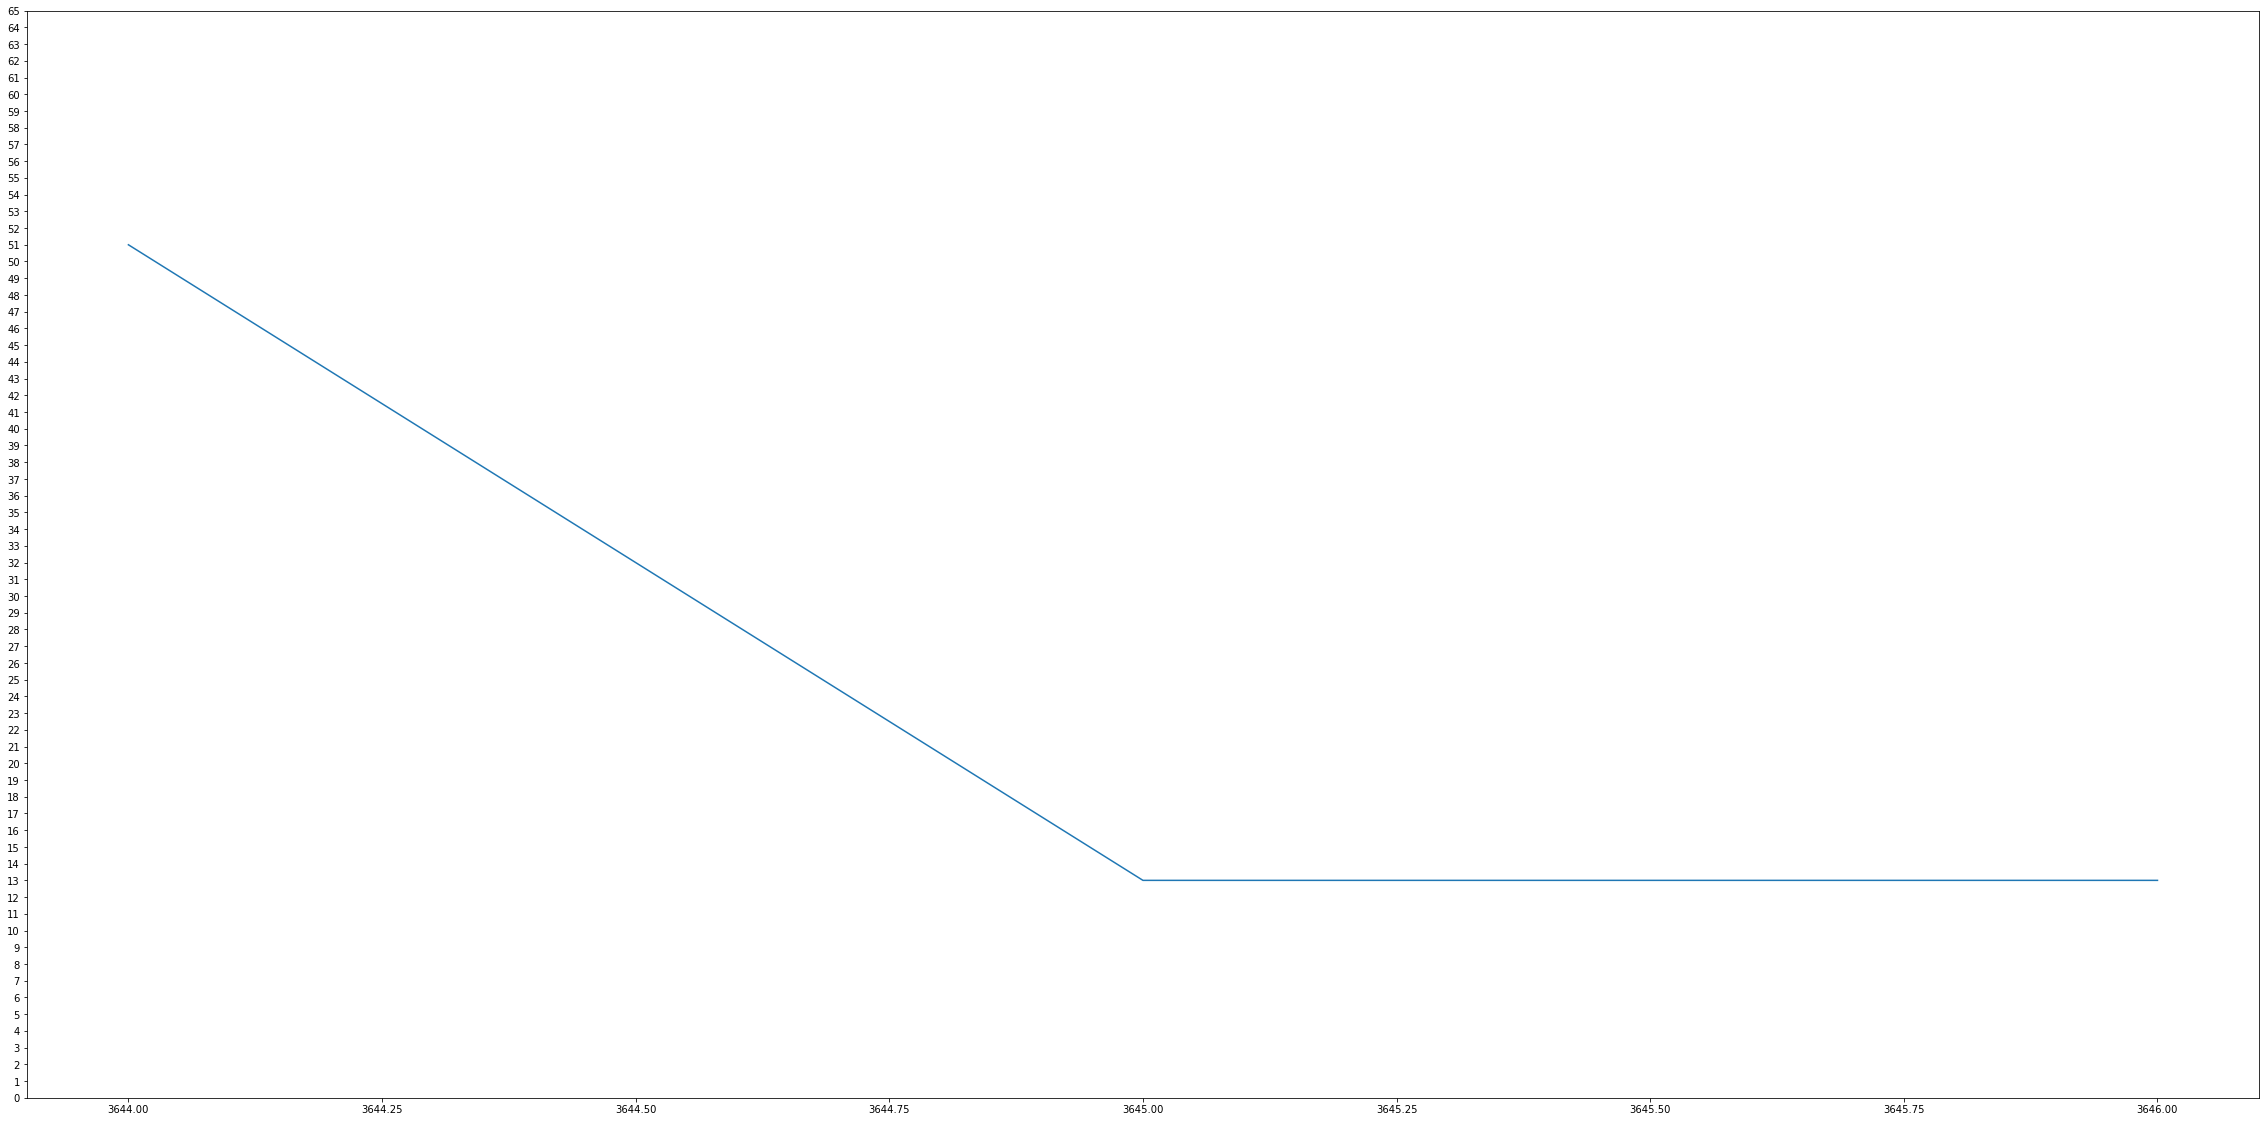

In [88]:
search_for(movie, range(3644,3647))

In [203]:
cluster_dict['02WGmidfd_antmovie201010194713']

for entry in cluster_dict['02WGmidfd_antmovie201010194713']:
    print(entry)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642


9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878


In [60]:
cluster_dict

{'10BYmidfd_antmovie200928223820': {123: 10.0,
  126: 10.0,
  127: 56.0,
  128: 56.0,
  129: 56.0,
  130: 13.0,
  131: 51.0,
  132: 56.0,
  133: 56.0,
  134: 56.0,
  3865: 10.0,
  3866: 10.0,
  3867: 10.0,
  3868: 10.0,
  3869: 10.0,
  3870: 10.0,
  3871: 10.0,
  3872: 10.0,
  3873: 10.0,
  3874: 10.0,
  3875: 10.0,
  3876: 10.0,
  3877: 10.0,
  3878: 10.0,
  3879: 10.0,
  3880: 10.0,
  3881: 10.0,
  3882: 10.0,
  3883: 10.0,
  3884: 10.0,
  3885: 10.0,
  3886: 10.0,
  3887: 10.0,
  3888: 10.0,
  3889: 10.0,
  3890: 10.0,
  3891: 10.0,
  3892: 10.0,
  3893: 10.0,
  3894: 10.0,
  3896: 10.0,
  3897: 10.0,
  3899: 10.0,
  3900: 10.0,
  3902: 10.0,
  3909: 10.0,
  3910: 10.0,
  3911: 10.0,
  3912: 10.0,
  3913: 10.0,
  3914: 10.0,
  3915: 10.0,
  3916: 10.0,
  3917: 10.0,
  3918: 10.0,
  3919: 10.0,
  3920: 10.0,
  3921: 10.0,
  3922: 10.0,
  3923: 10.0,
  3924: 10.0,
  3925: 10.0,
  3926: 10.0,
  3927: 10.0,
  3928: 10.0,
  3929: 10.0,
  3930: 55.0,
  3931: 10.0,
  3932: 10.0,
  3933: 10

In [93]:
def add_frames(_list,_range):
    for frame in _range:
        _list.append(frame)